In [1]:
from processing.DataLoader import DataLoaderFactory
from processing.AlignerBuilder import *
from processing.Visualizer import Visualizer

In [38]:
sequenceLoader = DataLoaderFactory.get_loader("random")

In [39]:
seq1 = sequenceLoader.load(50)
seq2 = sequenceLoader.load(50)

print(f"Sequence 1: {seq1}")
print(f"Sequence 2: {seq2}")

Sequence 1: KQHPDFANWEFEEDAMMASRYMESFVEKAPTHMWQTQTHVRPHDVPKCKC
Sequence 2: FPRAFPMYHFLEHMKWLHHLLRTMHILFTISHNVLLGYPYGHMCTTCSMK


In [40]:
aligner = AlignerBuilder().with_args(
                                AlignerArgs(
                                    mismatch_score=-1,
                                    target_internal_extend_gap_score=0.5,
                                    target_internal_open_gap_score=0.5
                                )
                            ).build()

In [41]:
alignments = aligner.align(seq1, seq2, matrix="blosum62")

In [42]:
aligner.matrix

AttributeError: 'PairwiseAligner' object has no attribute 'matrix'

In [26]:
print(f"\nAlignment Score: {alignments.score}")
for alignment in alignments:
    print(alignment)
    break


Alignment Score: 105.0
target            0 -----W----QHKTH-GPA---H----TTK--AC--RAN-----VCCCRNC-IQIGN---
                  0 -----|----|--|.-||----|----.-.--|---|-------|---|---|--||---
query             0 LPSLDWNRFIQ--TYCGP-YPEHPMYES-QPYA-IGR--PYGIMV---R--TI--GNRME

target           30 HYSGCP-HCLIICDAILADHN 50
                 60 |------||------------ 81
query            46 H-----MHC------------ 50



In [30]:
def get_matchline(alignment):
    matchline = []
    for a, b in zip(alignment[0], alignment[1]):
        if a == b and a != "-":
            matchline.append("|")
        elif a == "-" or b == "-":
            matchline.append("-")
        else:
            matchline.append(".")
    return "".join(matchline)

print(f"\nMatchline: {get_matchline(alignment)}")


Matchline: -----|----|--|.-||----|----.-.--|---|-------|---|---|--||---|------||------------


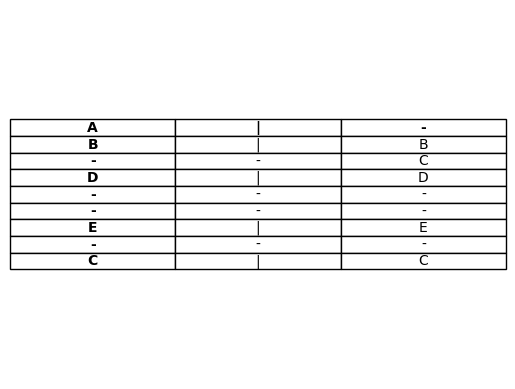

In [37]:
import matplotlib.pyplot as plt

def plot_alignment_without_gaps(seq1, seq2, matchline):
    grid = []
    for a, b, m in zip(seq1, seq2, matchline):
        grid.append([a, m, b])

    fig, ax = plt.subplots()
    ax.axis('off')

    

# Secuencias alineadas y matchline
seq1 = "AB-D--E-C"
matchline = "||-|--|-|"
seq2 = "-BCD--E-C"

# Graficar la matriz sin huecos
plot_alignment_without_gaps(seq1, seq2, matchline)


In [15]:
import matplotlib.pyplot as plt

def plot_alignment_matrix(seq1, seq2):
    """
    Representa gráficamente la matriz de alineamientos omitiendo los guiones (-).

    Args:
        seq1 (str): Secuencia 1 alineada (target).
        seq2 (str): Secuencia 2 alineada (query).
    """
    # Crear una figura
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Dibujar la cuadrícula
    for i in range(len(seq1)):
        for j in range(len(seq2)):
            if seq1[j] != '-' and seq2[i] != '-':  # Ignorar huecos
                if seq1[j] == seq2[i]:  # Coincidencia
                    ax.add_patch(plt.Rectangle((j, i), 1, 1, color='cyan', alpha=0.5))
                    ax.text(j + 0.5, i + 0.5, seq1[j], ha='center', va='center', fontsize=10, color="black")
                else:  # Desajuste
                    ax.text(j + 0.5, i + 0.5, '.', ha='center', va='center', fontsize=10, color="black")
    
    # Configurar los ejes
    ax.set_xticks(range(len(seq1)))
    ax.set_xticklabels([char for char in seq1 if char != '-'], fontsize=10, rotation=90)
    ax.set_yticks(range(len(seq2)))
    ax.set_yticklabels([char for char in seq2 if char != '-'], fontsize=10)

    # Ajustar los límites
    ax.set_xlim(0, len(seq1))
    ax.set_ylim(0, len(seq2))
    ax.invert_yaxis()  # Invertir el eje Y para una representación más intuitiva
    ax.set_xticks(range(len(seq1) + 1), minor=True)
    ax.set_yticks(range(len(seq2) + 1), minor=True)
    ax.grid(which="minor", color="black", linestyle='-', linewidth=1)
    ax.tick_params(which="minor", size=0)

    # Título y diseño final
    plt.title("Alignment Matrix", fontsize=14)
    plt.show()

# Ejemplo de secuencias alineadas
seq1 = "-----W----QHKTH-GP-A--H----TTK--AC--RAN-----VCCCRNC-IQIGN---HYSGCP-HCLIICDAILADHN"
seq2 = "LPSLDWNRFIQ--TYCGPY-PEHPMYES-QPYA-IGR--PYGIMV---R--TI--GNRMEH-----MHC------------"

# Graficar la matriz
plot_alignment_matrix(seq1, seq2)


ValueError: The number of FixedLocator locations (81), usually from a call to set_ticks, does not match the number of labels (50).

Error in callback <function flush_figures at 0x133ee6ac0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 